# Multi-Layer Perceptron Classification with and without applying PCA

- Data Exploration
    - Numerical Features Distribution
    - Categorical Features Distribution
- Preprocessing
    - Label Encoding
    - Standardization 
    - Splitting
- Multi-Layer Perceptron Model
    - Evaluate Model
- Multi-Layer Perceptron Model (With PCA)
    - Covariance matrix
    - Computing Eigenvectors and Eigenvalues: 
    - Selecting Principal Components
    - Evaluate Model

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from pretty_confusion_matrix import pp_matrix, pp_matrix_from_data



sns.set(rc={'figure.figsize':(20,8)})
plt.style.use('fivethirtyeight')

In [2]:
# !pip install pretty-confusion-matrix

### Data: HR_comma_sep.csv

In [3]:
# Load data
data=pd.read_csv('HR_comma_sep.csv')

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Exploration

In [4]:
print(data.head())
print ("_"*90)
print('Number of rows: {}, Number of columns: {}'.format(*data.shape))
names = data.columns.values
print ("_"*90)
print (names)
target = pd.DataFrame(data["left"]) #  Interim DF only -Target Feature
names1 = target.columns.values
print ("_"*90)
print (names1)
print ("_"*90)
print('Number of rows: {}, Number of columns: {}'.format(*target.shape))
print ("_"*90)
print (target["left"].value_counts())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

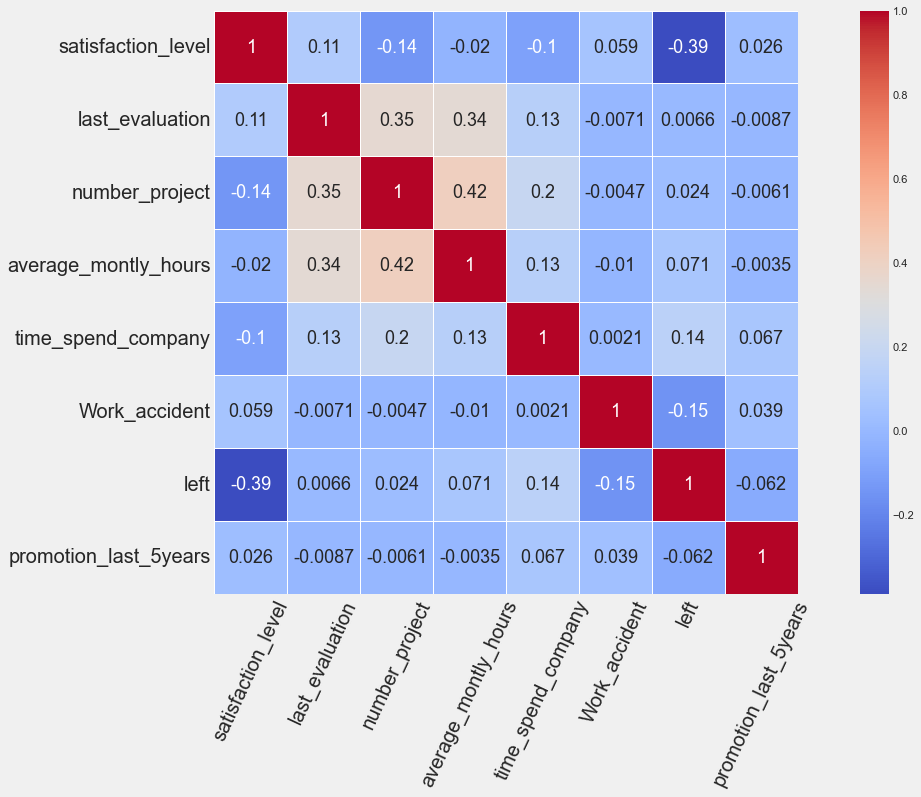

In [5]:
plt.figure(figsize=(20,10))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True, square=True, linewidths=1, annot_kws={"fontsize":18});
plt.yticks(fontsize=20);
plt.xticks(fontsize=20, rotation=65);

In [6]:
numerical = [
  'satisfaction_level', 'last_evaluation',  'average_montly_hours', 
]
categorical = [
  'sales', 'salary', 'number_project', 'time_spend_company', 'left', 'Work_accident', 'promotion_last_5years' 
]

### Numerical Features Distribution

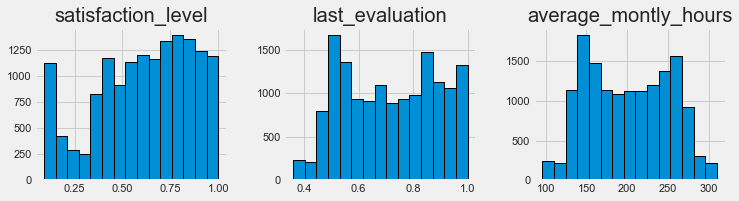

In [7]:

data[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4), edgecolor='black', linewidth=1);

### Categorical Features Distribution

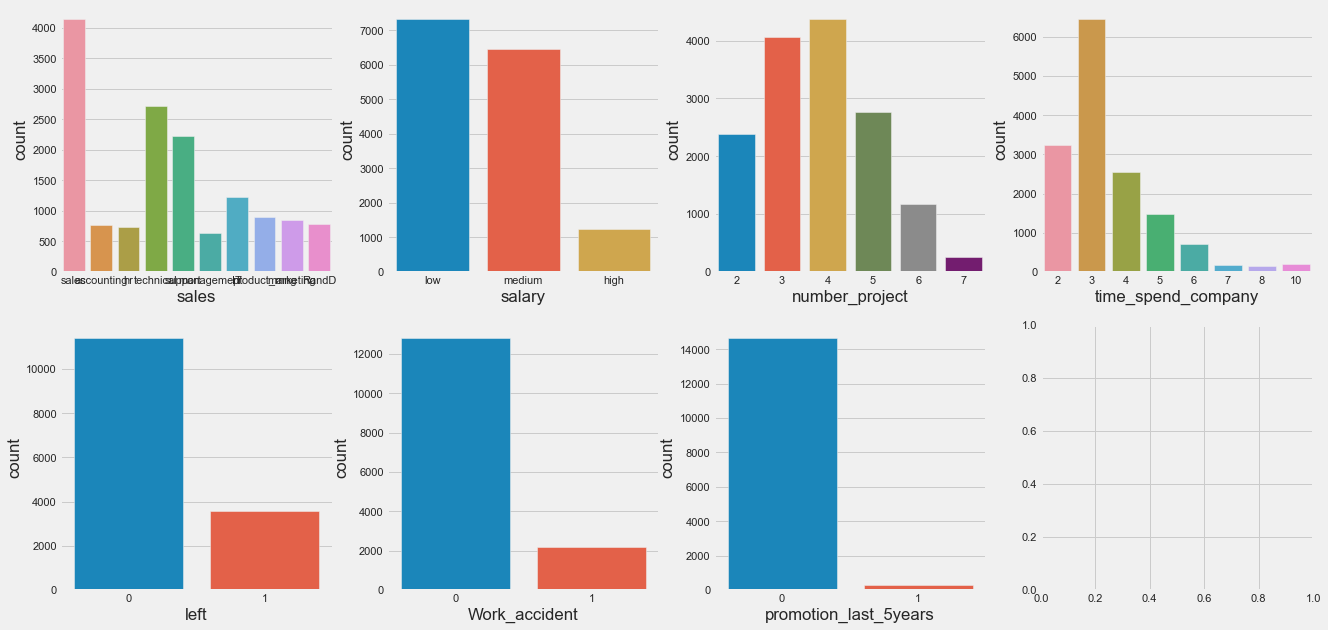

In [8]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=data[variable], ax=subplot)

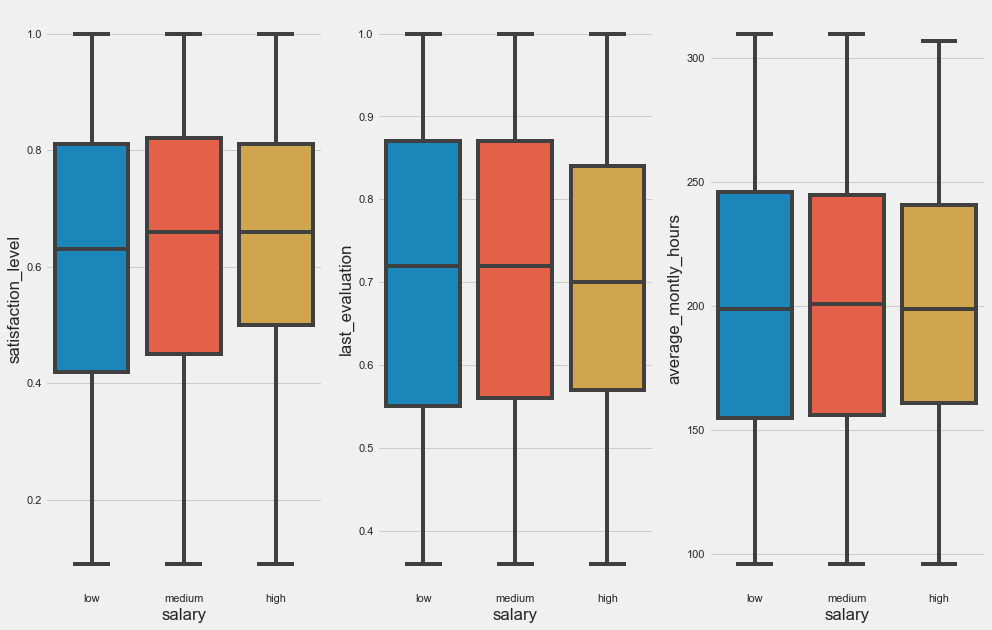

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(y=var, x='salary', data=data, ax=subplot)

### Preprocessing: Label Encoding

In [10]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])

### Preprocessing: Standardization & Splitting 

In [11]:
X = data.drop('left', axis=1)
y = data['left']

X_scaled = StandardScaler().fit_transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% training and 30% test

### Multi-Layer Perceptron Model

In [32]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6, 5),
                    random_state=5,
                    verbose=True,
                    activation = 'relu',
                    solver = 'adam',
                    alpha=0.0001,
                    batch_size=min(200, len(data)),
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.49413242
Iteration 2, loss = 0.28656399
Iteration 3, loss = 0.22704171
Iteration 4, loss = 0.19788343
Iteration 5, loss = 0.18337450
Iteration 6, loss = 0.17529448
Iteration 7, loss = 0.17077286
Iteration 8, loss = 0.16666989
Iteration 9, loss = 0.16541404
Iteration 10, loss = 0.16158241
Iteration 11, loss = 0.15972984
Iteration 12, loss = 0.15739297
Iteration 13, loss = 0.15497316
Iteration 14, loss = 0.15266817
Iteration 15, loss = 0.15089113
Iteration 16, loss = 0.15234810
Iteration 17, loss = 0.14929190
Iteration 18, loss = 0.14831589
Iteration 19, loss = 0.14840303
Iteration 20, loss = 0.14741860
Iteration 21, loss = 0.14526581
Iteration 22, loss = 0.14505683
Iteration 23, loss = 0.14293297
Iteration 24, loss = 0.14414200
Iteration 25, loss = 0.14260573
Iteration 26, loss = 0.14259575
Iteration 27, loss = 0.14117177
Iteration 28, loss = 0.14120200
Iteration 29, loss = 0.14111770
Iteration 30, loss = 0.13983602
Iteration 31, loss = 0.13893008
Iteration 32, los

MLPClassifier(batch_size=200, hidden_layer_sizes=(6, 5),
              learning_rate_init=0.01, random_state=5, verbose=True)

### Evaluate Model

In [34]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.9564444444444444

In [35]:
print(classification_report(y_test, ypred, target_names=['class A', 'class B']))

              precision    recall  f1-score   support

     class A       0.97      0.98      0.97      3428
     class B       0.92      0.90      0.91      1072

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



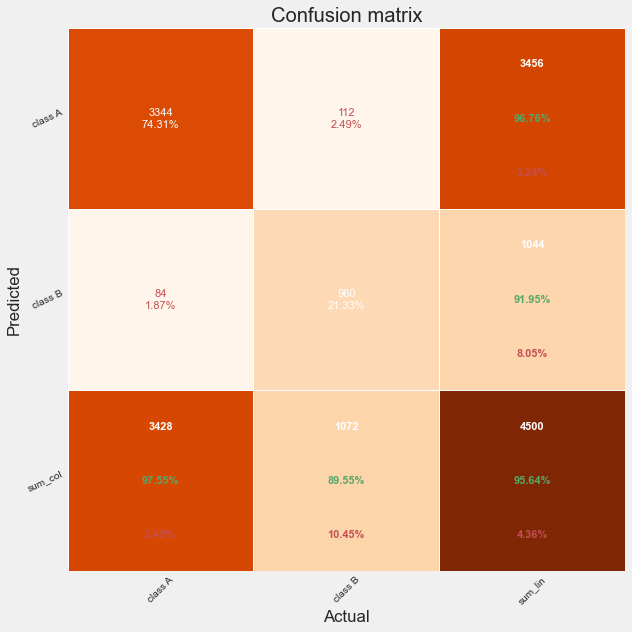

In [45]:
pp_matrix_from_data(y_test,ypred)

### Classification Model (With PCA)

#### Computing Eigenvectors and Eigenvalues: Covariance matrix

In [48]:
print('Covariance matrix: \n%s' % np.cov(X_scaled.T))

cov_matrix = np.cov(X_scaled.T)

Covariance matrix: 
[[ 1.00006668e+00  1.05028216e-01 -1.42979119e-01 -2.00494499e-02
  -1.00872798e-01  5.87011547e-02  2.56068929e-02  3.15350740e-03
   1.17549436e-02]
 [ 1.05028216e-01  1.00006668e+00  3.49355880e-01  3.39764452e-01
   1.31599496e-01 -7.10476220e-03 -8.68434690e-03  7.77263822e-03
   1.39658459e-02]
 [-1.42979119e-01  3.49355880e-01  1.00006668e+00  4.17238452e-01
   1.96799012e-01 -4.74086380e-03 -6.06436224e-03  9.26889467e-03
   9.67240198e-03]
 [-2.00494499e-02  3.39764452e-01  4.17238452e-01  1.00006668e+00
   1.27763428e-01 -1.01435645e-02 -3.54465062e-03  3.91339390e-03
   7.08243258e-03]
 [-1.00872798e-01  1.31599496e-01  1.96799012e-01  1.27763428e-01
   1.00006668e+00  2.12055948e-03  6.74374215e-02 -1.80107645e-02
  -3.08646144e-03]
 [ 5.87011547e-02 -7.10476220e-03 -4.74086380e-03 -1.01435645e-02
   2.12055948e-03  1.00006668e+00  3.92480513e-02  3.42530661e-03
  -2.50577295e-03]
 [ 2.56068929e-02 -8.68434690e-03 -6.06436224e-03 -3.54465062e-03
   6.743

In [49]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)

Eigenvectors 
[[ 0.08760794  0.29187061 -0.27791062 -0.33621599  0.79290488 -0.22733114
  -0.0116024   0.18576515  0.04289505]
 [-0.50706831 -0.30926463  0.70821614 -0.07354629  0.33279265 -0.08665328
  -0.09222669  0.11375009  0.02352387]
 [-0.5787685   0.77742527  0.0060955   0.1968302  -0.10135873  0.09141452
  -0.03633279 -0.03485564 -0.02631511]
 [-0.5489497  -0.45799711 -0.63434692  0.25291279  0.10512154  0.01983939
  -0.08733431  0.05858598 -0.00531445]
 [-0.31316383 -0.05346562 -0.12248909 -0.78960955 -0.30171256 -0.06373657
   0.38061826 -0.14166134 -0.02349491]
 [ 0.01930983 -0.04422065  0.03635678  0.0597888   0.35562044  0.71075798
   0.40466537 -0.33158071 -0.29568989]
 [-0.0097104  -0.00449634  0.04813527  0.38824554  0.07108182 -0.54036915
   0.72817055 -0.13802226  0.02235954]
 [-0.00628364 -0.01075202 -0.00876626 -0.03226481  0.07264824 -0.35314872
  -0.37036178 -0.70531716 -0.48383377]
 [-0.01759533 -0.00810327 -0.00657    -0.0030309   0.10677084  0.07816295
  -0.079

#### Selecting Principal Components

In [50]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.8304638814170422
1.128646358050611
1.0725966530073643
1.0012762420714998
0.9912917409265785
0.9492580022821767
0.8453257407574334
0.6335920882568038
0.548149373241164


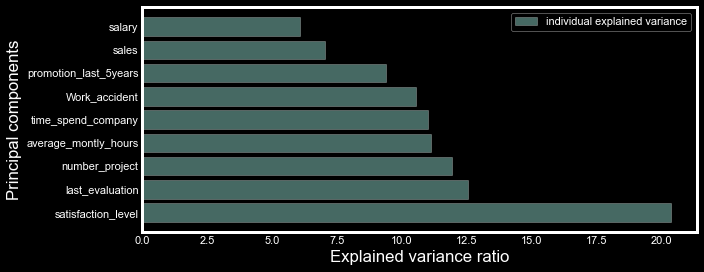

In [51]:
# how many principal components are we going to choose for our new feature subspace?
# ANSWER: explained variance tells us how much information (variance) can be attributed to each of the principal components

cols = data.columns.tolist()
cols.insert(0, cols.pop(cols.index('left')))

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

x_pos = [i for i, _ in enumerate(cols[1:])]

with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 4))

    plt.barh(x_pos, var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.xlabel('Explained variance ratio')
    plt.ylabel('Principal components')
    plt.yticks(x_pos, cols[1:])
    plt.legend(loc='best')
    plt.tight_layout()
    plt.grid(False)

Text(0, 0.5, 'Cumulative explained variance')

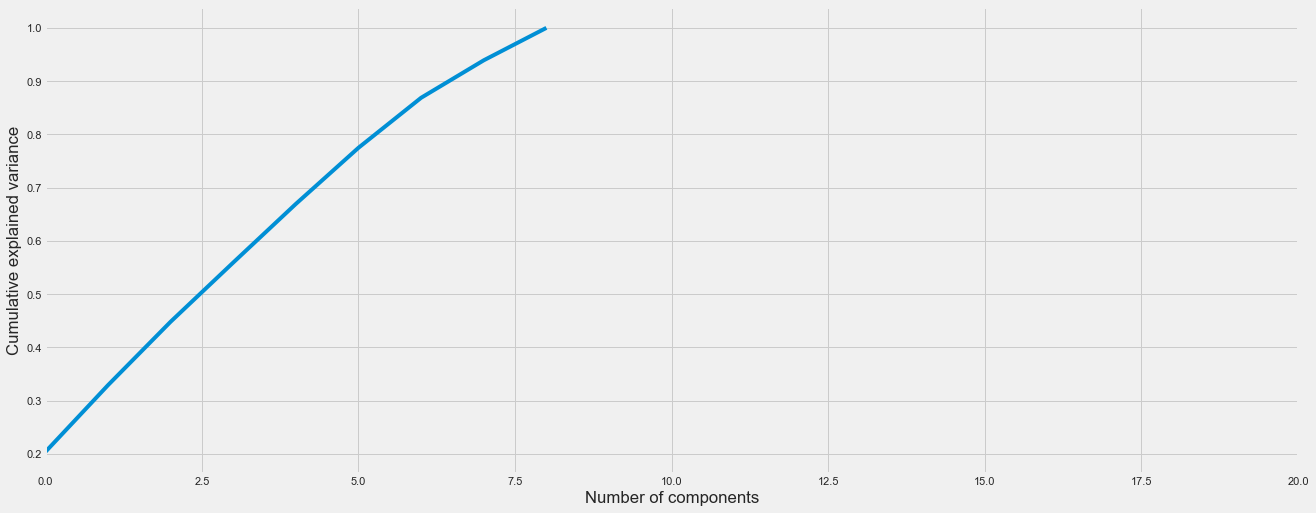

In [52]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,20,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [53]:
pca = PCA(n_components=6)

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

X = data.drop('left', axis=1)
y = data['left']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

clf.fit(X_train, y_train)



Iteration 1, loss = 0.56178140
Iteration 2, loss = 0.30418515
Iteration 3, loss = 0.24935821
Iteration 4, loss = 0.24274407
Iteration 5, loss = 0.23650466
Iteration 6, loss = 0.23349578
Iteration 7, loss = 0.22776772
Iteration 8, loss = 0.22161755
Iteration 9, loss = 0.20990022
Iteration 10, loss = 0.19990648
Iteration 11, loss = 0.19153757
Iteration 12, loss = 0.18387949
Iteration 13, loss = 0.17818432
Iteration 14, loss = 0.17444694
Iteration 15, loss = 0.17181828
Iteration 16, loss = 0.16869905
Iteration 17, loss = 0.16853387
Iteration 18, loss = 0.16431014
Iteration 19, loss = 0.16263170
Iteration 20, loss = 0.16162752
Iteration 21, loss = 0.15774835
Iteration 22, loss = 0.15638743
Iteration 23, loss = 0.15564517
Iteration 24, loss = 0.15438570
Iteration 25, loss = 0.15293214
Iteration 26, loss = 0.15150406
Iteration 27, loss = 0.15196482
Iteration 28, loss = 0.15105226
Iteration 29, loss = 0.14891686
Iteration 30, loss = 0.15006275
Iteration 31, loss = 0.14757987
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [54]:
pca.explained_variance_ratio_

array([0.20330509, 0.12516281, 0.11858808, 0.11137011, 0.11018458,
       0.10548504])

In [55]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Calcuate accuracy
accuracy_score(y_test,ypred)



0.9553333333333334

In [56]:

print(classification_report(y_test, ypred, target_names=['class A', 'class B']))

              precision    recall  f1-score   support

     class A       0.96      0.98      0.97      3428
     class B       0.94      0.87      0.90      1072

    accuracy                           0.96      4500
   macro avg       0.95      0.93      0.94      4500
weighted avg       0.95      0.96      0.95      4500



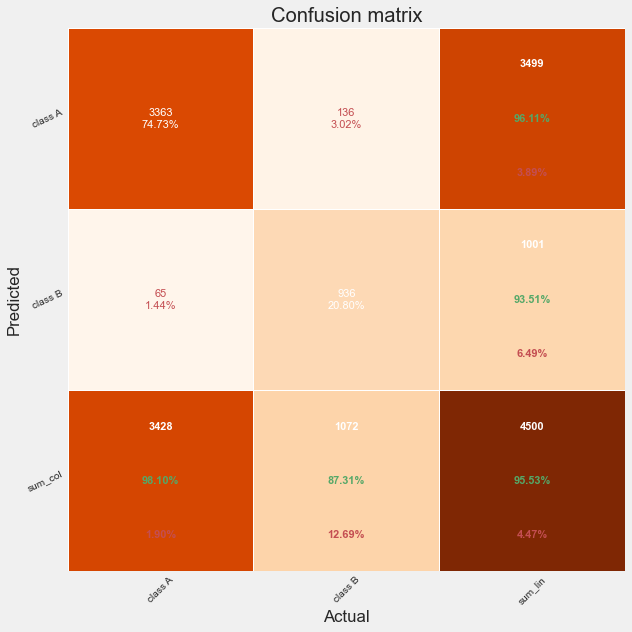

In [57]:
pp_matrix_from_data(y_test,ypred)